In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

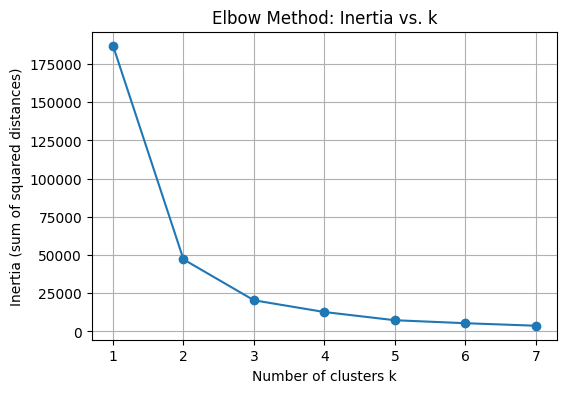

Cluster centers (mean ages): [np.float64(21.963350785340293), np.float64(31.808411214953278), np.float64(44.01418439716313), np.float64(57.43769968051116)]


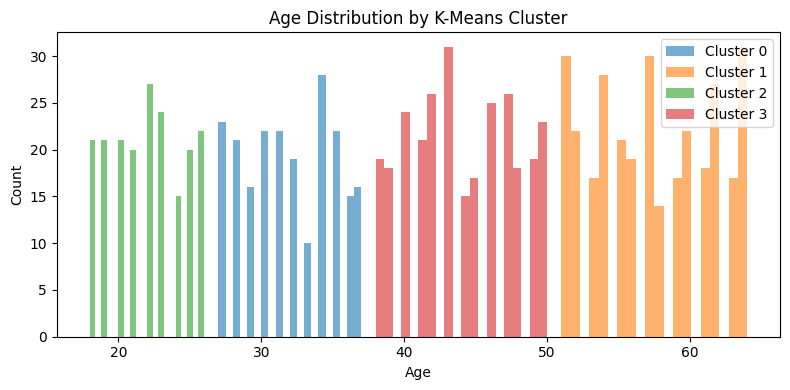

In [2]:
# Finding Age Clusters with K-Means
# We'll use k-means on the Age column to find natural age segments.

# 1) Load data
df = pd.read_csv('../data/cleaned_data.csv')

# 2) Extract Age and reshape for sklearn
ages = df['Age'].values.reshape(-1, 1)

# 3) Use the elbow method to choose k
inertia = []
K_range = range(1, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(ages)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, '-o')
plt.title('Elbow Method: Inertia vs. k')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (sum of squared distances)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# From the elbow plot, pick an appropriate k (e.g. k=4)
k = 4

# 4) Fit k-means with the chosen k
kmeans = KMeans(n_clusters=k, random_state=42)
df['AgeCluster'] = kmeans.fit_predict(ages)

# 5) Inspect cluster centers (sorted)
centers = sorted(kmeans.cluster_centers_.flatten())
print("Cluster centers (mean ages):", centers)

# 6) Visualize histogram of ages colored by cluster
plt.figure(figsize=(8,4))
for cluster_label in range(k):
    cluster_ages = df.loc[df['AgeCluster']==cluster_label, 'Age']
    plt.hist(cluster_ages, bins=20, alpha=0.6, label=f'Cluster {cluster_label}')
plt.title('Age Distribution by K-Means Cluster')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
# Ensure kmeans clustering has been performed and df['AgeCluster'] exists
# 1) Compute and sort the cluster centers (mean ages)
centers = sorted(kmeans.cluster_centers_.flatten())
print("Cluster centers (mean ages):", centers)

# 2) Calculate midpoints for bin edges
tmid = [(centers[i] + centers[i+1]) / 2 for i in range(len(centers)-1)]
print("Midpoints (bin cut-offs):", tmid)

# 3) Build bins from 0 up through max age+1, using midpoints
t_bins = [0] + tmid + [df['Age'].max() + 1]
labels = [f"{int(t_bins[i])}-{int(t_bins[i+1])}" for i in range(len(t_bins)-1)]
print("New age-group labels:", labels)

# 4) Create a new AgeGroup_kmeans column
df['AgeGroup_kmeans'] = pd.cut(
    df['Age'], bins=t_bins, labels=labels, right=False
)

# 5) Inspect the new grouping
display(df[['Age', 'AgeCluster', 'AgeGroup_kmeans']].head())
print(df['AgeGroup_kmeans'].value_counts())

Cluster centers (mean ages): [np.float64(21.963350785340293), np.float64(31.808411214953278), np.float64(44.01418439716313), np.float64(57.43769968051116)]
Midpoints (bin cut-offs): [np.float64(26.885881000146785), np.float64(37.9112978060582), np.float64(50.72594203883715)]
New age-group labels: ['0-26', '26-37', '37-50', '50-65']


,Age,AgeCluster,AgeGroup_kmeans
0,34.0,0,26-37
1,26.0,2,0-26
2,50.0,3,37-50
3,37.0,0,26-37
4,30.0,0,26-37


AgeGroup_kmeans
50-65    313
37-50    282
26-37    214
0-26     191
Name: count, dtype: int64
